# Machine Learning Project

## Introduction

In [350]:
import pandas as pd

In [351]:
PATH = '../gaming/playstation/'
df_achievements = pd.read_csv(PATH + 'achievements.csv')
df_games = pd.read_csv(PATH + 'games.csv')
df_history = pd.read_csv(PATH + 'history.csv')
df_players = pd.read_csv(PATH + 'players.csv')
df_prices = pd.read_csv(PATH + 'prices.csv')
df_purchased_games = pd.read_csv(PATH + 'purchased_games.csv')

## Transformation to target dataset

In [352]:
# Get the sum of purchased games
def sum_games(str_list):
    list = eval(str_list)
    return len(list)

purchased_games = df_purchased_games['library'].apply(sum_games)
purchased_games

df1 = df_purchased_games.copy()
df1['purchased_games'] = purchased_games
df1.head()

,playerid,library,purchased_games
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172


In [353]:
platinum_achievements = df_achievements[df_achievements['rarity'].str.strip() == 'Platinum']
merged_df = df_history[df_history['achievementid'].isin(platinum_achievements['achievementid'])]
platinum_count = merged_df.groupby('playerid').size()

df1['highest_achievements'] = df1['playerid'].map(platinum_count).fillna(0).astype(int)
df1.head()

,playerid,library,purchased_games,highest_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0


In [354]:
medium_achievements = df_achievements[df_achievements['rarity'].str.strip().isin(['Gold', 'Silver'])]
merged_df = df_history[df_history['achievementid'].isin(medium_achievements['achievementid'])]
medium_count = merged_df.groupby('playerid').size()

df1['medium_achievements'] = df1['playerid'].map(medium_count).fillna(0).astype(int)
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0


In [355]:
lowest_achievements = df_achievements[df_achievements['rarity'].str.strip() == 'Bronze']
merged_df = df_history[df_history['achievementid'].isin(lowest_achievements['achievementid'])]
lowest_count = merged_df.groupby('playerid').size()

df1['lowest_achievements'] = df1['playerid'].map(lowest_count).fillna(0).astype(int)
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0


> IMPORTANT: After investigation I found out that most of the achievements are not complete, so we will get rid of players without lowest_achievements

In [356]:
df1 = df1[df1['lowest_achievements'] > 0]
print(df1.shape)
df1.head()

(5000, 6)


,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056
6,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161
8,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145
10,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783
12,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037


In [357]:
# Get the most played genre by each player
def clean_genre(genre):
    if isinstance(genre, list):
        return genre
    elif isinstance(genre, str):
        try:
            return eval(genre) if genre.startswith('[') and genre.endswith(']') else [genre]
        except:
            return [genre]
    else:
        return []

game_genres_dict = df_games.set_index('gameid')['genres'].apply(clean_genre).to_dict()


def greatest_genre(library_str):
    library_list = eval(library_str)

    all_genres = []
    for game_id in library_list:
        all_genres.extend(game_genres_dict.get(game_id, []))
    
    genre_series = pd.Series(all_genres)
    most_common_genre = genre_series.mode()[0] if not genre_series.empty else None
    return most_common_genre

df1['most_played_genre'] = df1['library'].apply(greatest_genre)
df1.head()



,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing
6,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action
8,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play
10,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play
12,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action


Before putting the money spent for each player, we are going to fill null values with the average (price)

In [358]:
df_prices['usd'] = df_prices['usd'].fillna(df_prices['usd'].mean())

In [359]:
# Get the total spent money in us
df1['library'] = df1['library'].apply(lambda x: [str(i).strip() for i in eval(x)])
df_prices['gameid'] = df_prices['gameid'].astype(str).str.strip()

library_expanded = df1[['playerid', 'library']].explode('library')
library_with_prices = library_expanded.merge(df_prices[['gameid', 'usd']], how='left', left_on='library', right_on='gameid')
total_spent_df = library_with_prices.groupby('playerid')['usd'].sum().reset_index()
df1 = df1.merge(total_spent_df[['playerid', 'usd']], on='playerid', how='left')

df1['total_spent_us'] = df1['usd']
df1.drop('usd', axis=1, inplace=True)

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us
0,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374
1,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action,1606.076595
2,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play,717.057957
3,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play,4201.700239
4,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action,22725.646440


In [360]:
# Getting a score of how fast a player is doing his first achievement on all of its games
df1['library'] = df1['library'].apply(lambda x: [str(i).strip() for i in x])

library_expanded = df1[['playerid', 'library']].explode('library')

library_expanded['library'] = library_expanded['library'].astype(str)
df_games['gameid'] = df_games['gameid'].astype(str)

library_with_release_dates = library_expanded.merge(df_games[['gameid', 'release_date']], how='left', left_on='library', right_on='gameid')
library_with_release_dates.dropna(inplace=True)

df_history['gameid'] = df_history['achievementid'].apply(lambda x: x.split('_')[0])

first_achievements = df_history.groupby(['playerid', 'gameid'])['date_acquired'].min().reset_index()

library_with_achievements = library_with_release_dates.merge(first_achievements[['playerid', 'gameid', 'date_acquired']], how='left', on=['playerid', 'gameid'])

library_with_achievements['release_date'] = pd.to_datetime(library_with_achievements['release_date'])
library_with_achievements['date_acquired'] = pd.to_datetime(library_with_achievements['date_acquired'])

library_with_achievements['time_to_first_achievement'] = (library_with_achievements['date_acquired'] - library_with_achievements['release_date']).dt.days

mean_time_to_first_achievement = library_with_achievements.groupby('playerid')['time_to_first_achievement'].mean().reset_index()

df1 = df1.merge(mean_time_to_first_achievement[['playerid', 'time_to_first_achievement']], on='playerid', how='left')

df1['achievement_rate'] = df1['time_to_first_achievement']
df1.drop('time_to_first_achievement', axis=1, inplace=True)

df1['achievement_rate'] = df1['achievement_rate'].fillna('No Value')

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate
0,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,229.981308
1,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action,1606.076595,125.611111
2,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play,717.057957,821.6
3,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play,4201.700239,51.647887
4,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action,22725.646440,794.080392


In [361]:
df1['achievement_rate'].value_counts()

achievement_rate
No Value      3
533.0         2
239.0         2
989.4         2
296.0         2
             ..
431.174242    1
143.288889    1
453.912752    1
658.289062    1
509.373626    1
Name: count, Length: 4985, dtype: int64

In [362]:
df1 = df1[df1['achievement_rate'] != 'No Value']
print(df1.shape)
df1.head()

(4997, 9)


,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate
0,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,229.981308
1,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action,1606.076595,125.611111
2,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play,717.057957,821.6
3,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play,4201.700239,51.647887
4,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action,22725.646440,794.080392


Finishing the details of the dataset

In [363]:
# Add a date to the last achievement activity of each player
df_history['date_acquired'] = pd.to_datetime(df_history['date_acquired'])

last_achievement = df_history.groupby('playerid')['date_acquired'].max().reset_index()
df1 = df1.merge(last_achievement, on='playerid', how='left')
df1.rename(columns={'date_acquired': 'last_achievement_date'}, inplace=True)
df1['last_achievement_date'] = df1['last_achievement_date'].fillna('No Value')

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date
0,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24
1,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31
2,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play,717.057957,821.6,2024-11-01 10:41:56
3,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07
4,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59


In [364]:
library_with_release_dates

,playerid,library,gameid,release_date
0,1911732,670209,670209,2024-04-26
1,1911732,694794,694794,2013-11-15
2,1911732,658551,658551,2024-03-19
3,1911732,582894,582894,2023-03-28
4,1911732,602666,602666,2023-06-22
...,...,...,...,...
1142476,301920,72,72,2009-05-26
1142477,301920,146,146,2008-09-16
1142478,301920,712,712,2016-11-15
1142479,301920,73,73,2009-10-13


In [365]:
# Add a date in which the player got its most old game (possible date when player started to play)
library_expanded = df1[['playerid', 'library']].explode('library')
library_with_release_dates = library_expanded.merge(df_games[['gameid', 'release_date']], how='left', left_on='library', right_on='gameid')
library_with_release_dates.dropna(inplace=True)
oldest_game_dates = library_with_release_dates.groupby('playerid')['release_date'].min().reset_index()
df1 = df1.merge(oldest_game_dates[['playerid', 'release_date']], on='playerid', how='left')
df1.rename(columns={'release_date': 'started_played_on'}, inplace=True)

df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on
0,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07
1,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20
2,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play,717.057957,821.6,2024-11-01 10:41:56,2014-02-05
3,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31
4,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28


In [366]:
# Adding the country value for each player
df1 = df1.merge(df_players[['playerid', 'country', 'nickname']], on='playerid', how='left')
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
1,411404,"[9459, 333860, 11989, 420057, 404720, 8336, 13...",46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20,United Kingdom,James_Westfall_
2,4605390,"[12653, 9459, 334328, 643858, 176538, 494230, ...",19,0,42,145,Free to Play,717.057957,821.6,2024-11-01 10:41:56,2014-02-05,Mexico,termino-pronto6
3,4314091,"[550305, 643858, 417808, 176538, 703215, 41780...",98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31,France,EviL___LaW
4,4469538,"[609934, 5661, 706557, 484353, 706555, 391607,...",840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28,France,Logann


In [367]:
df1.drop(columns=['library'], inplace=True)
df1.shape

(4997, 12)

In [368]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   playerid               4997 non-null   int64         
 1   purchased_games        4997 non-null   int64         
 2   highest_achievements   4997 non-null   int64         
 3   medium_achievements    4997 non-null   int64         
 4   lowest_achievements    4997 non-null   int64         
 5   most_played_genre      4997 non-null   object        
 6   total_spent_us         4997 non-null   float64       
 7   achievement_rate       4997 non-null   object        
 8   last_achievement_date  4997 non-null   datetime64[ns]
 9   started_played_on      4997 non-null   object        
 10  country                4997 non-null   object        
 11  nickname               4997 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory u

In [369]:
# Exporting because the generation of this dataset took around 1 hour...
df1.to_csv('gamers_profile_3.csv', index=False)

## Data Engineering

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import product
import scipy.stats as ss
import pandas as pd

In [384]:
df1 = pd.read_csv('gamers_profile_3.csv')
print(df1.shape)
df1.head()

(4997, 12)


,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,1911732,137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
1,411404,46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20,United Kingdom,James_Westfall_
2,4605390,19,0,42,145,Free to Play,717.057957,821.600000,2024-11-01 10:41:56,2014-02-05,Mexico,termino-pronto6
3,4314091,98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31,France,EviL___LaW
4,4469538,840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28,France,Logann


### Numerical Values

In [385]:
def draw_numerical(column_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df1[column_name], color='skyblue', bins=20, ax=axes[0])
    sns.boxplot(x=df1[column_name], color='lightgreen', ax=axes[1]) 

    plt.tight_layout()
    plt.show()

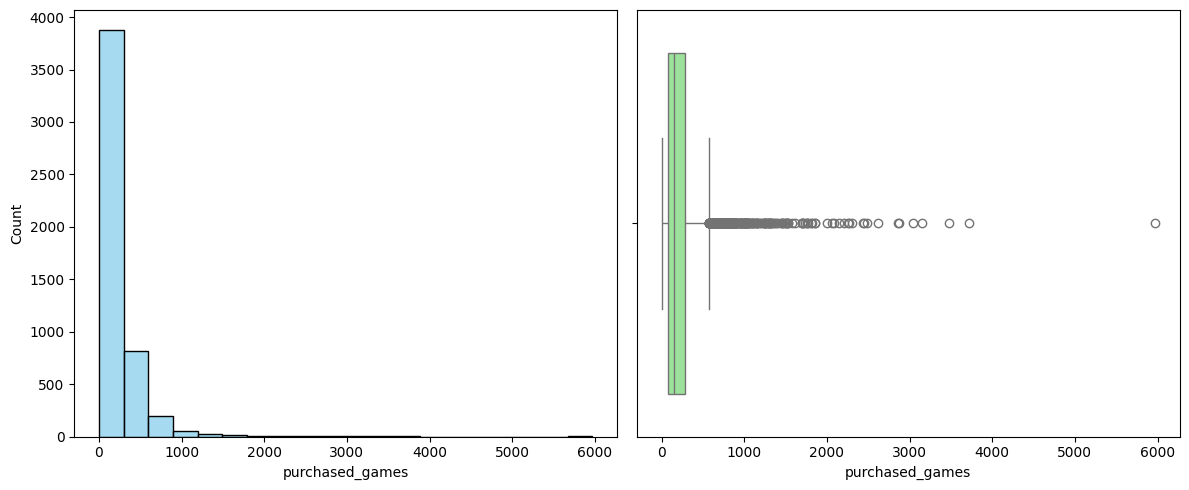

In [386]:
draw_numerical('purchased_games')

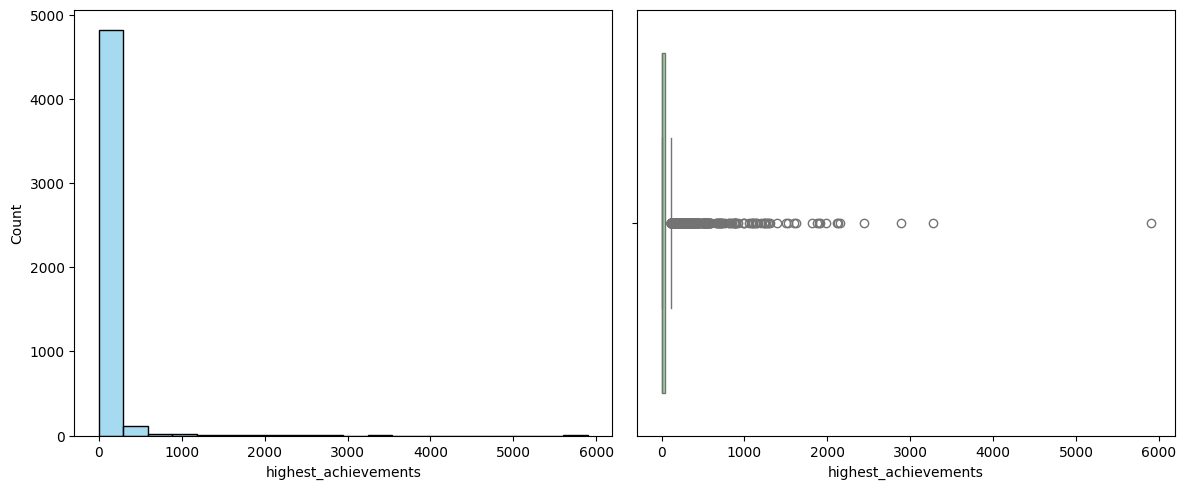

In [387]:
draw_numerical('highest_achievements')

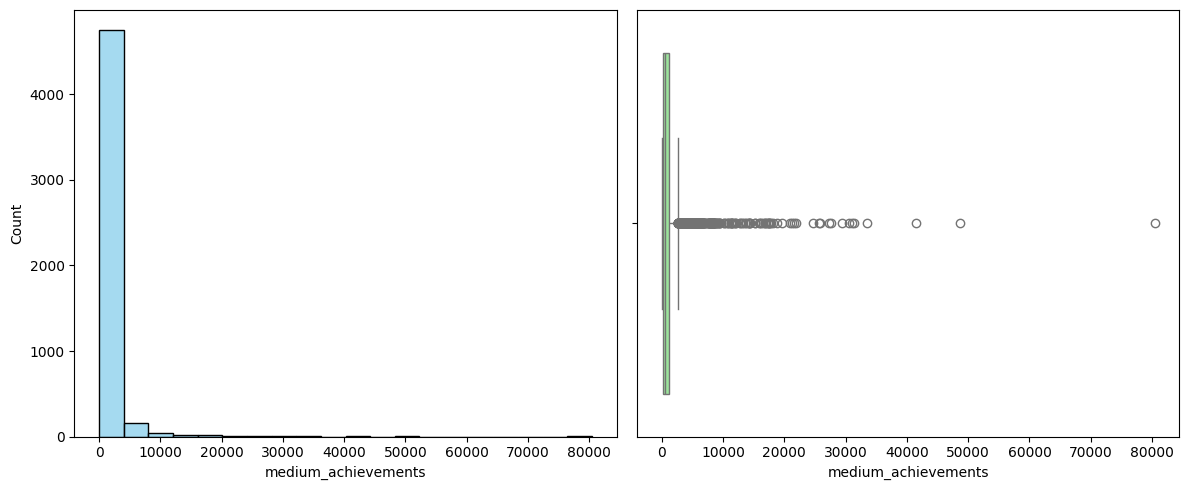

In [388]:
draw_numerical('medium_achievements')

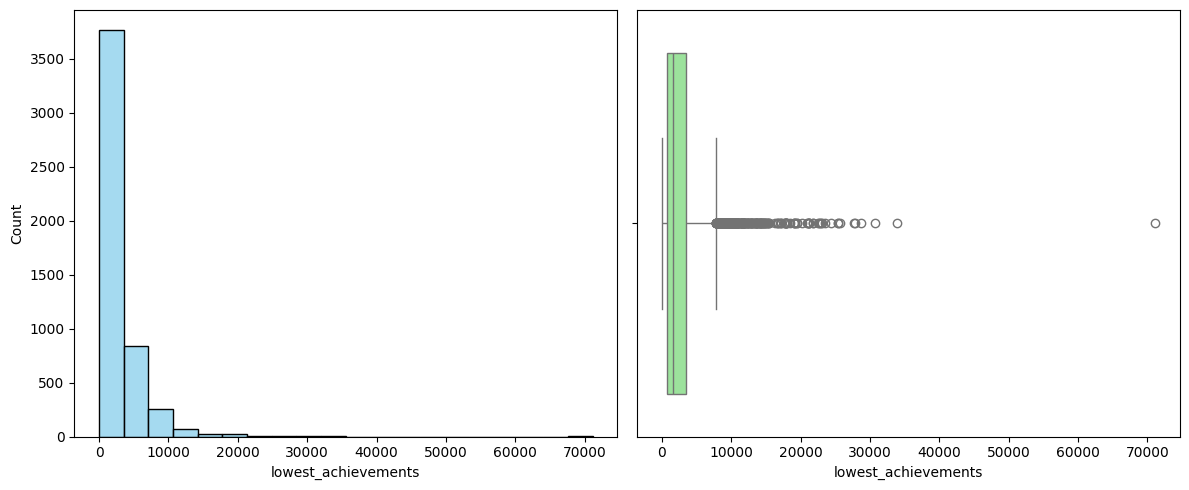

In [389]:
draw_numerical('lowest_achievements')

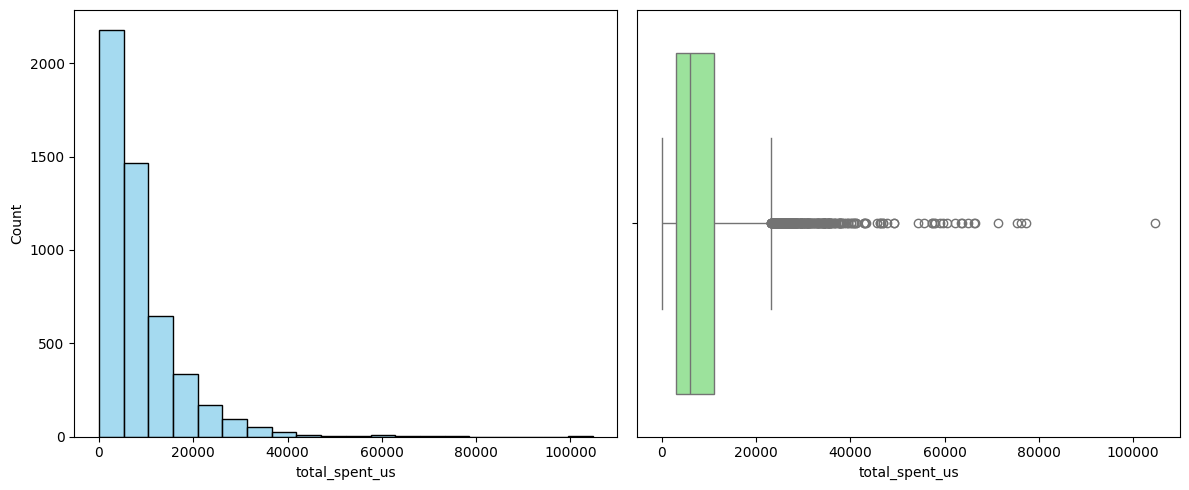

In [390]:
draw_numerical('total_spent_us')

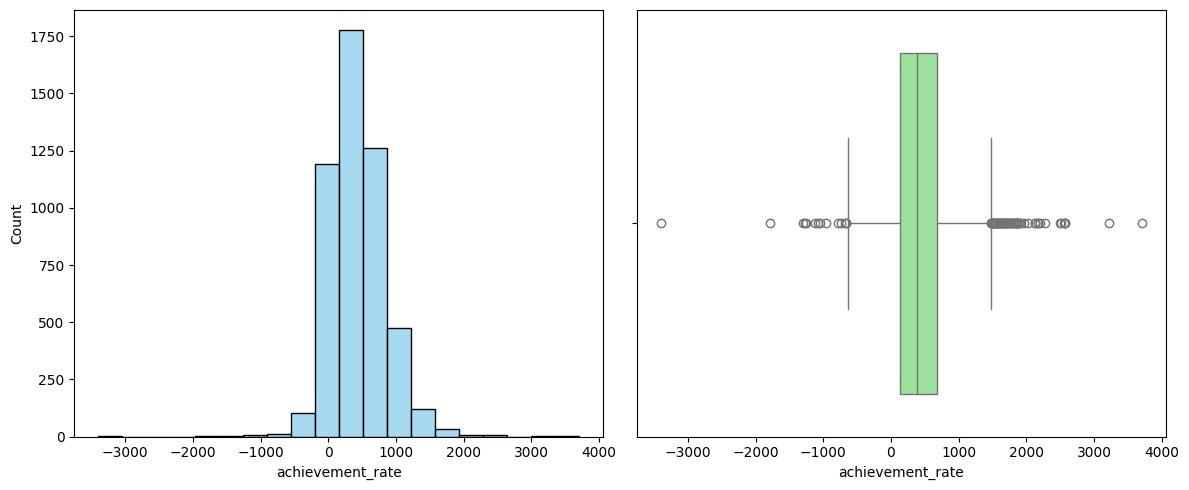

In [391]:
draw_numerical('achievement_rate')

### Categorical Values

#### Genre

In [392]:
sorted_arr = np.sort([x for x in df1['most_played_genre'].unique() if x is not None])
print(sorted(sorted_arr))

['Action', 'Action Horror', 'Action-Adventure', 'Action-RPG', 'Adventure', 'Automobile', 'Baseball', 'Battle Royale', "Beat 'em up", 'Fighting', 'First Person Shooter', 'Football', 'Free to Play', 'Hack & Slash', 'Indie', 'Mech', 'Open World', 'Platformer', 'Puzzle', 'RPG', 'Racing', 'Role Playing', 'Role-Playing Games (RPG)', "Shoot 'em up", 'Simulation', 'Sports', 'Stealth', 'Third Person Shooter', 'Visual Novel', 'fighting', 'shooter', 'sports', 'strategy']


In [393]:
def clean_genre(genre):
    genre_lower = str(genre).lower()
    if genre_lower == 'action horror':
        return 'horror'
    elif genre_lower == 'action-adventure':
        return 'adventure'
    elif genre_lower == 'action-rpg':
        return 'rpg'
    elif genre_lower == 'arcade racing':
        return 'racing'
    elif genre_lower == 'educational & trivia':
        return 'educational'
    elif genre_lower == 'equestrian sports':
        return 'sports'
    elif genre_lower == 'first person shooter':
        return 'shooter'
    elif genre_lower == 'music & rhythm':
        return 'music'
    elif genre_lower == 'music+':
        return 'music'
    elif genre_lower == 'role playing':
        return 'rpg'
    elif genre_lower == 'role-playing games (rpg)':
        return 'rpg'
    elif genre_lower == 'shoot \'em up':
        return 'shooter'
    elif genre_lower == 'simulation racing':
        return 'racing'
    elif genre_lower == 'survival horror':
        return 'horror'
    elif genre_lower == 'third person shooter':
        return 'shooter'
    else:
        return genre_lower
    
df2 = df1.copy()
df2['most_played_genre'] = df2['most_played_genre'].apply(clean_genre)

print(df2['most_played_genre'].unique())
print(df2.shape)
df2.head()

['rpg' 'action' 'free to play' 'shooter' 'adventure' 'sports' 'open world'
 'platformer' 'indie' 'racing' 'fighting' 'football' 'automobile' 'puzzle'
 'stealth' 'simulation' 'visual novel' 'battle royale' 'strategy'
 'hack & slash' 'mech' 'baseball' 'horror' "beat 'em up"]
(4997, 12)


,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,1911732,137,19,442,2056,rpg,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
1,411404,46,0,63,161,action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20,United Kingdom,James_Westfall_
2,4605390,19,0,42,145,free to play,717.057957,821.600000,2024-11-01 10:41:56,2014-02-05,Mexico,termino-pronto6
3,4314091,98,3,202,783,free to play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31,France,EviL___LaW
4,4469538,840,235,4115,7037,action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28,France,Logann


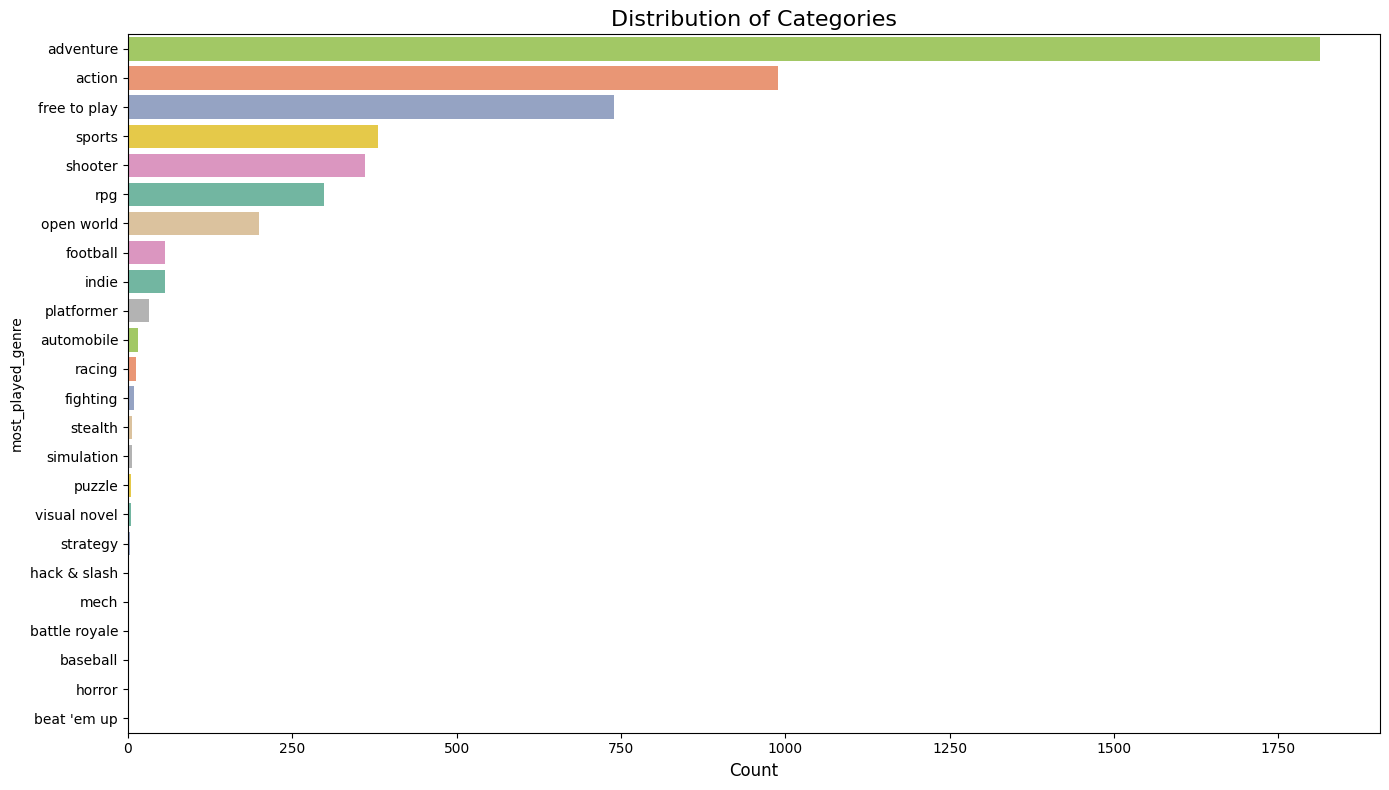

In [394]:
plt.figure(figsize=(14, 8))
sns.countplot(y='most_played_genre', 
              data=df2, 
              palette='Set2', 
              order=df2['most_played_genre'].value_counts().index, 
              hue=df2['most_played_genre'])

plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

#### Country

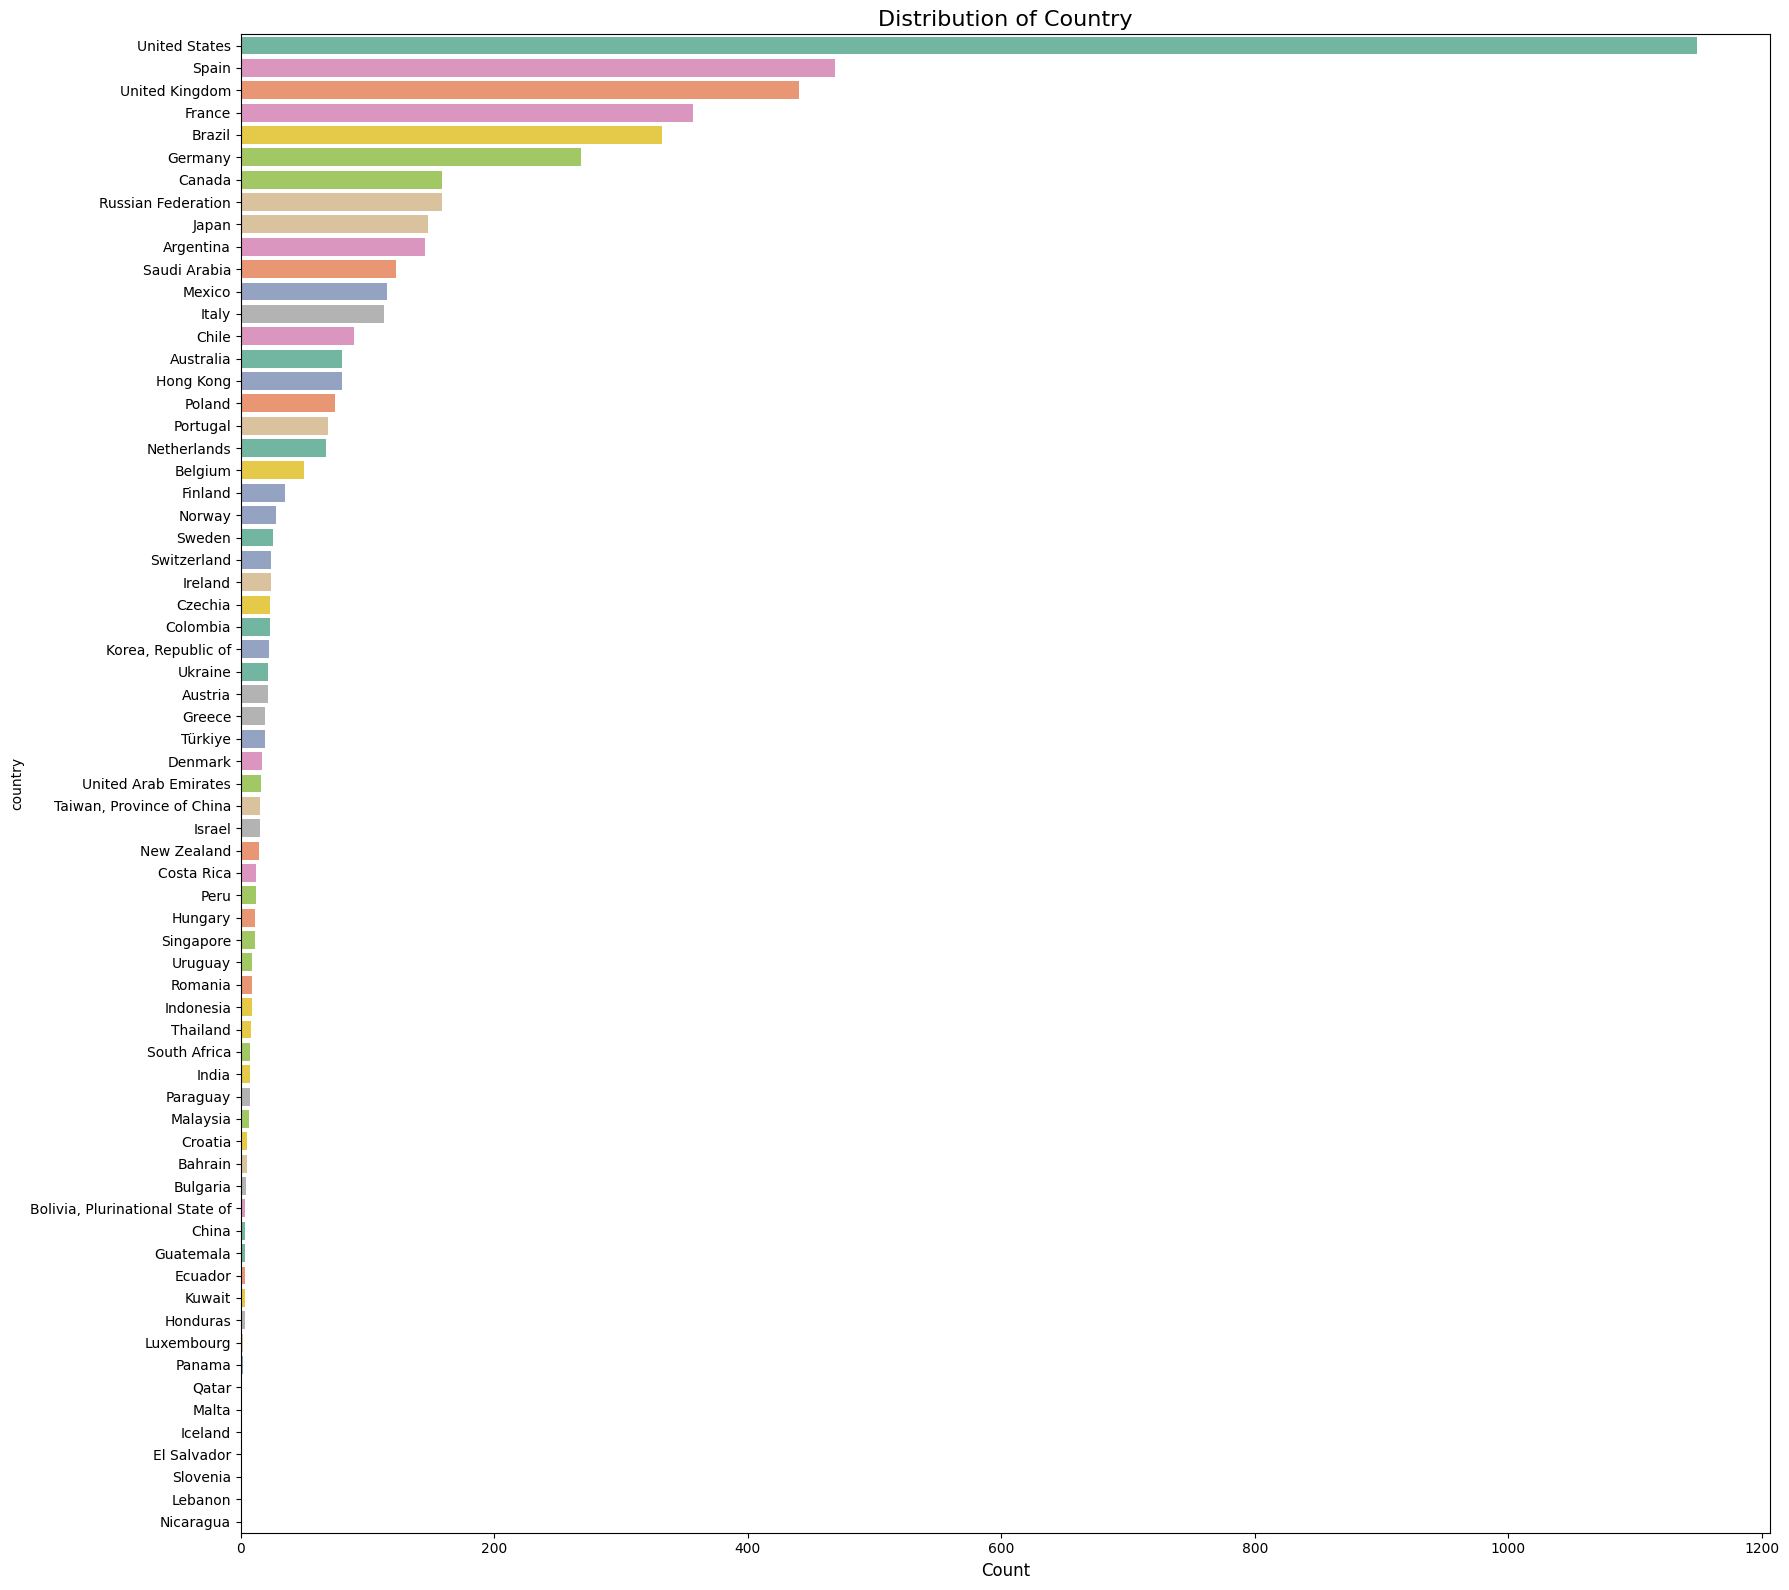

In [395]:
plt.figure(figsize=(18, 16))
sns.countplot(y='country', 
              data=df2, 
              palette='Set2', 
              order=df2['country'].value_counts().index, 
              hue=df2['country'])

plt.title('Distribution of Country', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

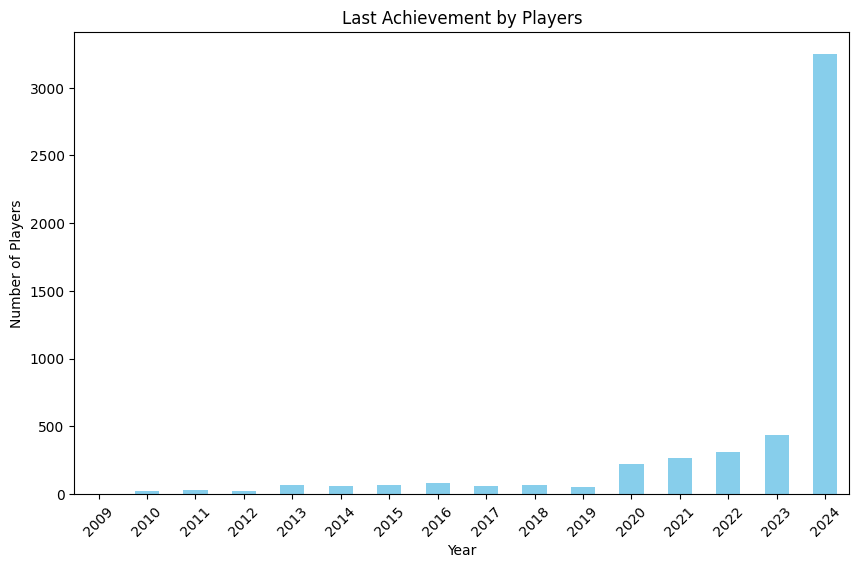

In [396]:
df_temp = df2.copy()
df_temp['last_achievement_date'] = pd.to_datetime(df_temp['last_achievement_date'], errors='coerce')
df_temp = df_temp.dropna(subset=['last_achievement_date'])
df_temp['last_achievement_date'] = pd.to_datetime(df_temp['last_achievement_date'])
df_temp['year'] = df_temp['last_achievement_date'].dt.year

nickname_counts_by_year = df_temp.groupby('year')['nickname'].nunique()

plt.figure(figsize=(10, 6))
nickname_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Last Achievement by Players')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

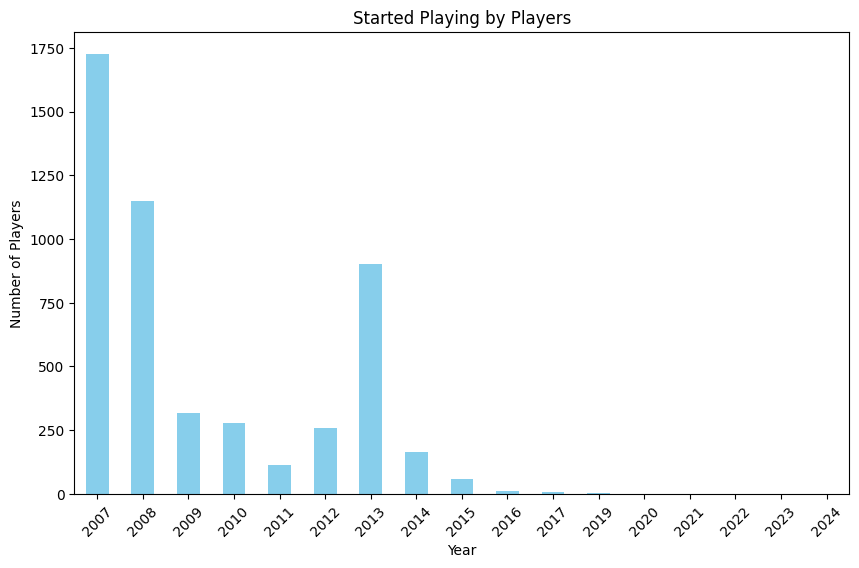

In [397]:
df_temp = df2.copy()
df_temp['started_played_on'] = pd.to_datetime(df_temp['started_played_on'], errors='coerce')
df_temp = df_temp.dropna(subset=['started_played_on'])
df_temp['started_played_on'] = pd.to_datetime(df_temp['started_played_on'])
df_temp['year'] = df_temp['started_played_on'].dt.year

nickname_counts_by_year = df_temp.groupby('year')['nickname'].nunique()

plt.figure(figsize=(10, 6))
nickname_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Started Playing by Players')
plt.xlabel('Year')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

#### Numerical Attributes

In [398]:
# Split date columns to year, month and day
def split_date(df, col_name):
    df[col_name] = pd.to_datetime(df[col_name], errors='coerce')

    df[f'{col_name}_year'] = df[col_name].dt.year.fillna(0).astype(int)
    df[f'{col_name}_month'] = df[col_name].dt.month.fillna(0).astype(int)
    df[f'{col_name}_day'] = df[col_name].dt.day.fillna(0).astype(int)

    df.drop(columns=[col_name], inplace=True)

df3 = df2.copy()
split_date(df3, 'last_achievement_date')
split_date(df3, 'started_played_on')
print(df3.shape)
df3.head()

(4997, 16)


,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,country,nickname,last_achievement_date_year,last_achievement_date_month,last_achievement_date_day,started_played_on_year,started_played_on_month,started_played_on_day
0,1911732,137,19,442,2056,rpg,7140.931374,229.981308,United States,Eldorath02,2024,11,28,2012,2,7
1,411404,46,0,63,161,action,1606.076595,125.611111,United Kingdom,James_Westfall_,2021,3,6,2014,2,20
2,4605390,19,0,42,145,free to play,717.057957,821.600000,Mexico,termino-pronto6,2024,11,1,2014,2,5
3,4314091,98,3,202,783,free to play,4201.700239,51.647887,France,EviL___LaW,2024,11,6,2011,5,31
4,4469538,840,235,4115,7037,action,22725.646440,794.080392,France,Logann,2024,11,16,2007,6,28


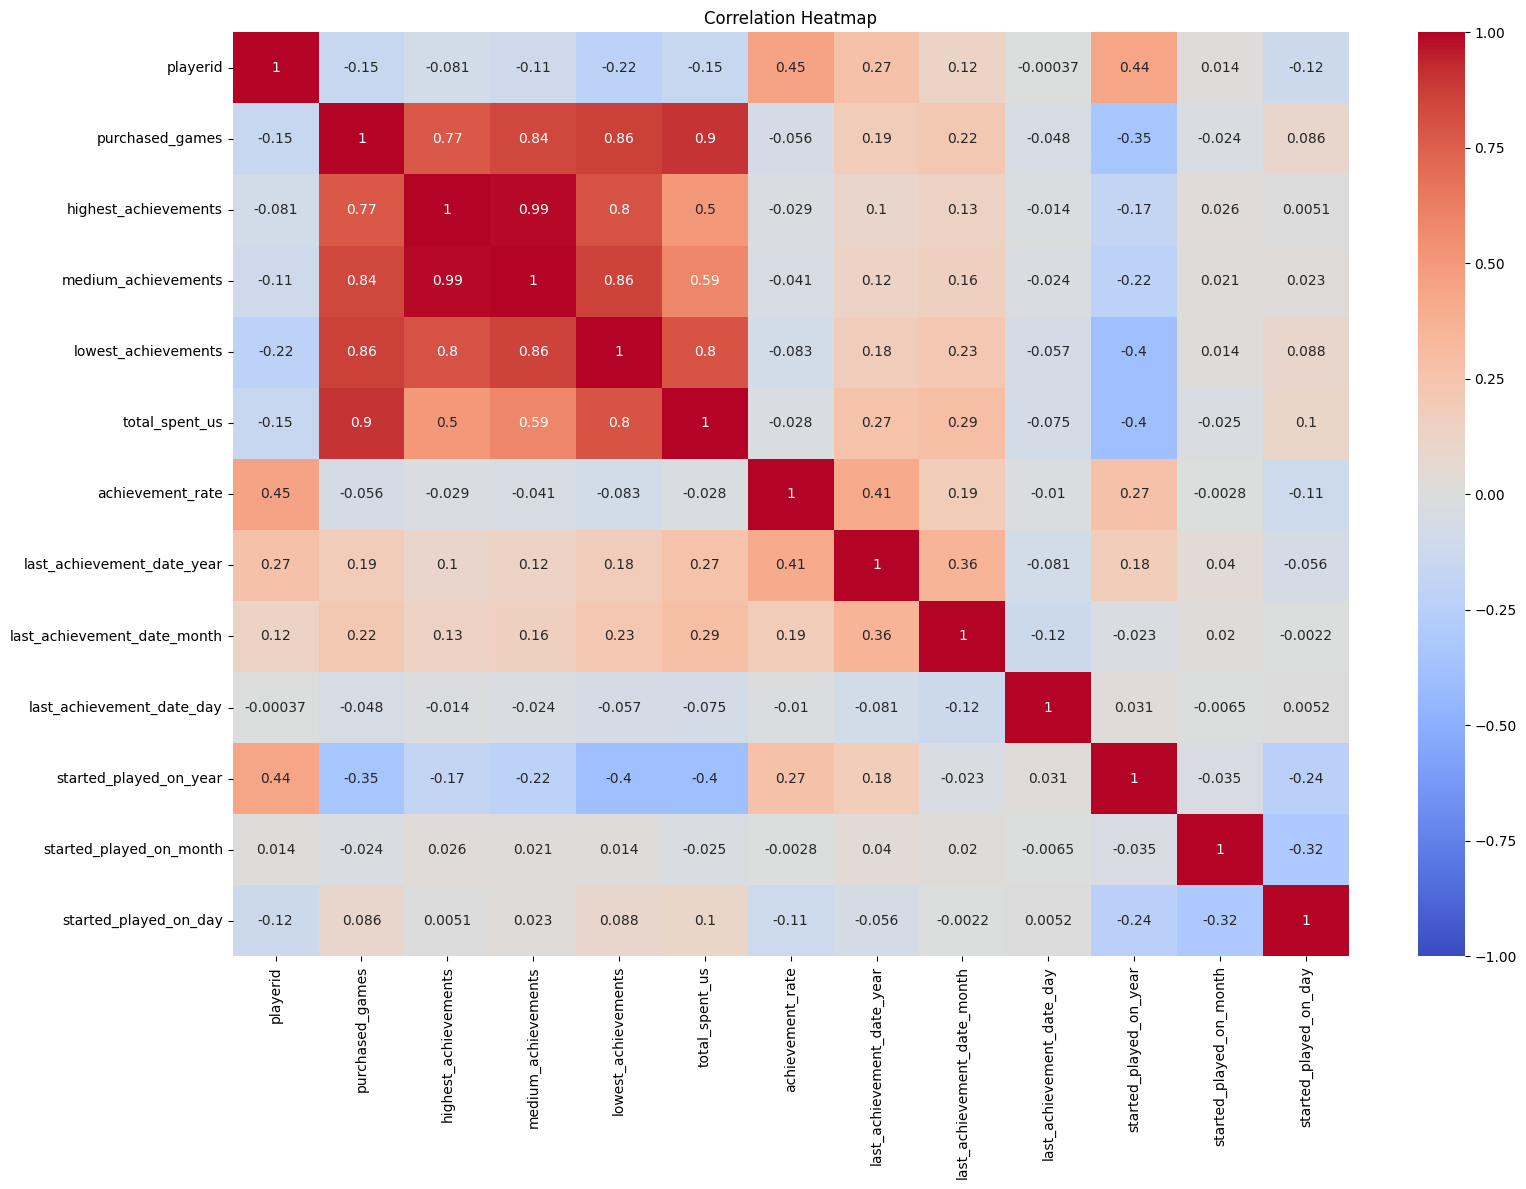

In [399]:
correlation_matrix = df3.corr(numeric_only=True)

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [400]:
# Get better column representation between medium_achievements and highest_achievements
print(df3.isna().sum())
print(f"Lowest Achievements: {df3[df3['lowest_achievements'] > 0]['lowest_achievements'].count()}")
print(f"Medium Achievements: {df3[df3['medium_achievements'] > 0]['medium_achievements'].count()}")
print(f"Highest Achievements: {df3[df3['highest_achievements'] > 0]['highest_achievements'].count()}")

print(f"Last Achievement Year: {df3[df3['last_achievement_date_year'] > 0]['last_achievement_date_year'].count()}")
print(f"Last Achievement Month: {df3[df3['last_achievement_date_month'] > 0]['last_achievement_date_month'].count()}")
print(f"Last Achievement Day: {df3[df3['last_achievement_date_day'] > 0]['last_achievement_date_day'].count()}")
print(f"Achievement Rate: {df3[df3['achievement_rate'] > 0]['achievement_rate'].count()}")

playerid                       0
purchased_games                0
highest_achievements           0
medium_achievements            0
lowest_achievements            0
most_played_genre              0
total_spent_us                 0
achievement_rate               0
country                        0
nickname                       0
last_achievement_date_year     0
last_achievement_date_month    0
last_achievement_date_day      0
started_played_on_year         0
started_played_on_month        0
started_played_on_day          0
dtype: int64
Lowest Achievements: 4997
Medium Achievements: 4988
Highest Achievements: 3869
Last Achievement Year: 4997
Last Achievement Month: 4997
Last Achievement Day: 4997
Achievement Rate: 4396


> There is high correlation between __medium_achievements__ and __highest_achievements__. We will keep __medium_achievements__ because it has more values that are greater than 0, so it covers more rows than __highest_achievements__. There are also correlation between __lowest_achievements__ with __medium_achievements__, but the difference between them is not too much, we can get rid of __lowest_achievements__.

> There is high correlation between __total_spent_us__ and __purchased_games__. We will kepp __purchased_games__ because in some countries the total spent could vary depending on the currency and may contain more bias.

In [401]:
df4 = df3.drop(columns=['highest_achievements', 'lowest_achievements', 'total_spent_us'])
print(df4.shape)
df4.head()

(4997, 13)


,playerid,purchased_games,medium_achievements,most_played_genre,achievement_rate,country,nickname,last_achievement_date_year,last_achievement_date_month,last_achievement_date_day,started_played_on_year,started_played_on_month,started_played_on_day
0,1911732,137,442,rpg,229.981308,United States,Eldorath02,2024,11,28,2012,2,7
1,411404,46,63,action,125.611111,United Kingdom,James_Westfall_,2021,3,6,2014,2,20
2,4605390,19,42,free to play,821.600000,Mexico,termino-pronto6,2024,11,1,2014,2,5
3,4314091,98,202,free to play,51.647887,France,EviL___LaW,2024,11,6,2011,5,31
4,4469538,840,4115,action,794.080392,France,Logann,2024,11,16,2007,6,28


#### Categorical Attributes

In [402]:
# nickname is unique, so removing it for now
df_temp = df4.drop(columns=['nickname'])
df_cat = pd.DataFrame(data = df_temp.dtypes, columns = ['a']).reset_index()
cat_var = list(df_cat['index'].loc[df_cat['a'] == 'object'])
df_cat = df_temp[cat_var]
df_cat.head()

,most_played_genre,country
0,rpg,United States
1,action,United Kingdom
2,free to play,Mexico
3,free to play,France
4,action,France


In [403]:
cat_var1 = ('most_played_genre', 'country')
cat_var2 = ('most_played_genre', 'country')
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

result = []
for i in cat_var_prod:
    if i[0] != i[1]:
        result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(df_cat[i[0]], df_cat[i[1]])))[1]))

chi_test_output = pd.DataFrame(result, columns = ['var1', 'var2', 'coeff'])
chi_test_output.pivot(index='var1', columns='var2', values='coeff')

var2,country,most_played_genre
var1,,
country,NaN,2.302329e-87
most_played_genre,2.302329e-87,NaN


> There is no correlation between the categorical attributes

### Outlier Analysis

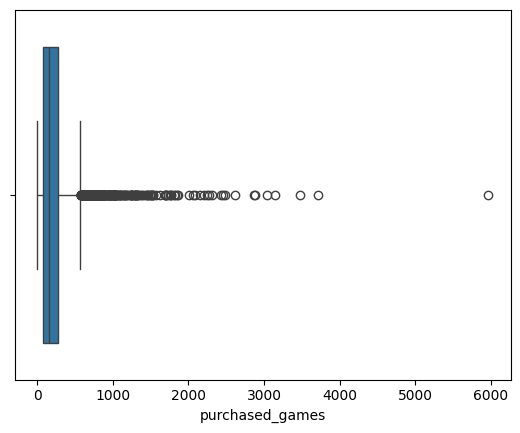

In [404]:
sns.boxplot(x=df4['purchased_games'])
plt.show()

> Purchased games has many outliers but the greater the amount is, the greater its significance; we will keep it

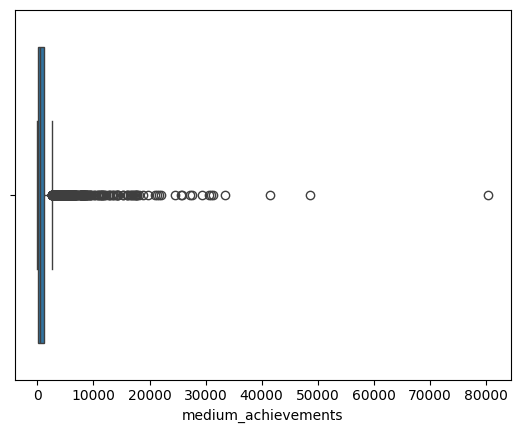

In [405]:
sns.boxplot(x=df4['medium_achievements'])
plt.show()

> Medium Achievements has many outliers but the greater the amount is, the greater its significance; we will keep it

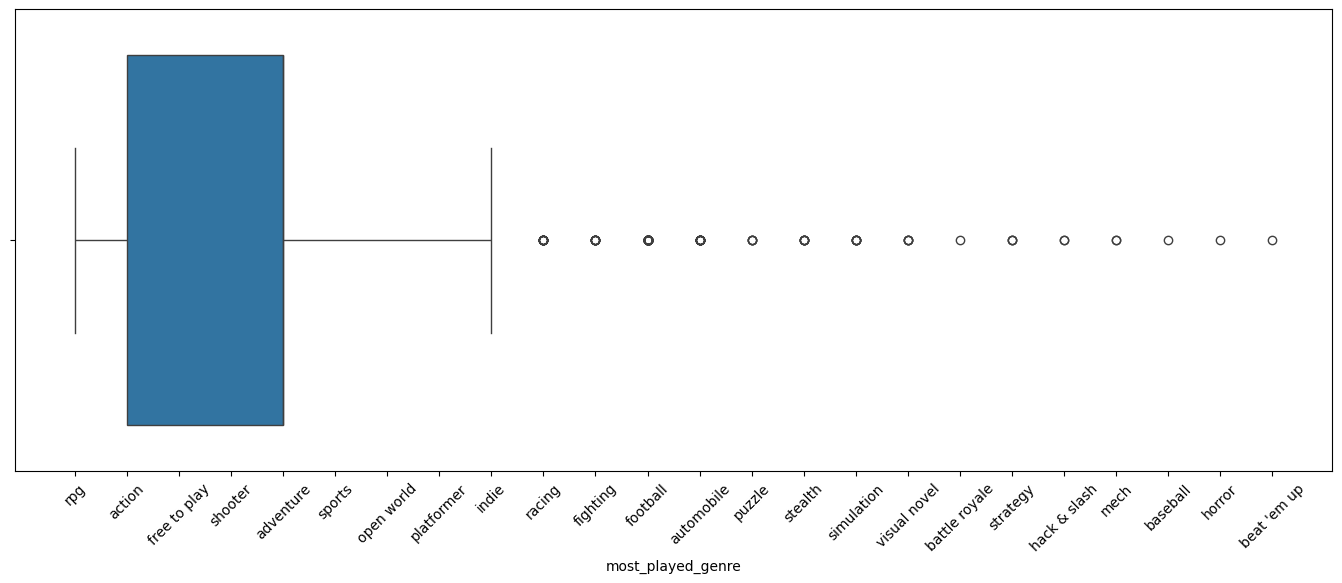

In [406]:
plt.figure(figsize=(17, 6))
sns.boxplot(x=df4['most_played_genre'])
plt.xticks(rotation=45)
plt.show()

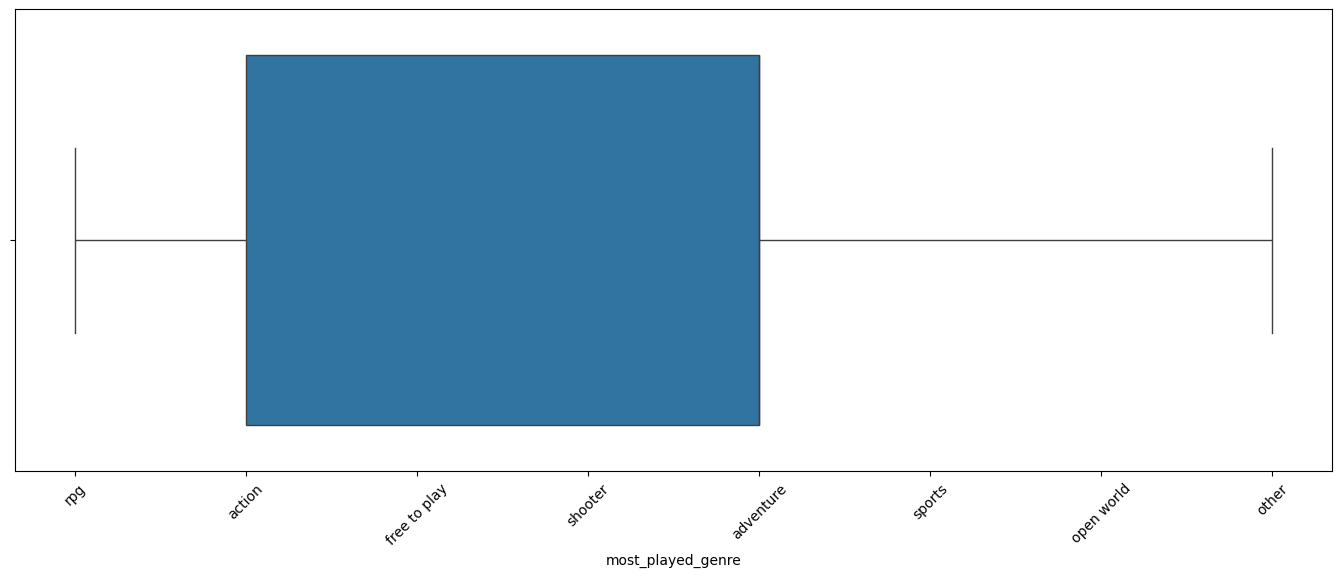

(4997, 13)


In [407]:
df5 = df4.copy()
category_counts = df5['most_played_genre'].value_counts()

threshold = 120
rare_categories = category_counts[category_counts < threshold].index

df5['most_played_genre'] = df5['most_played_genre'].apply(lambda x: x if x not in rare_categories else 'other')

plt.figure(figsize=(17, 6))
sns.boxplot(x=df5['most_played_genre'])
plt.xticks(rotation=45)
plt.show()
print(df5.shape)

In [408]:
df5['most_played_genre'].unique()

array(['rpg', 'action', 'free to play', 'shooter', 'adventure', 'sports',
       'open world', 'other'], dtype=object)

> Outliers were replaced by the 'other' category in Most Played Genre

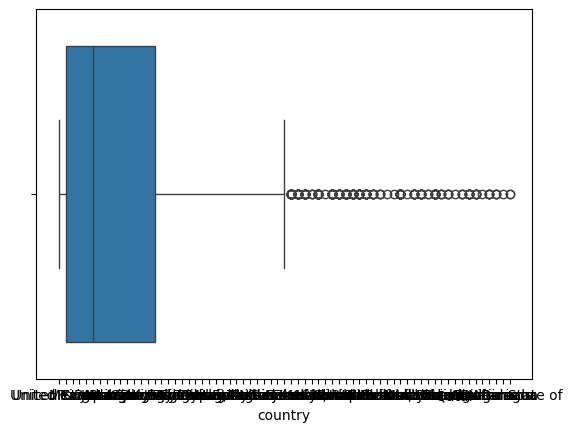

In [409]:
sns.boxplot(x=df5['country'])
plt.show()

(4997, 13)


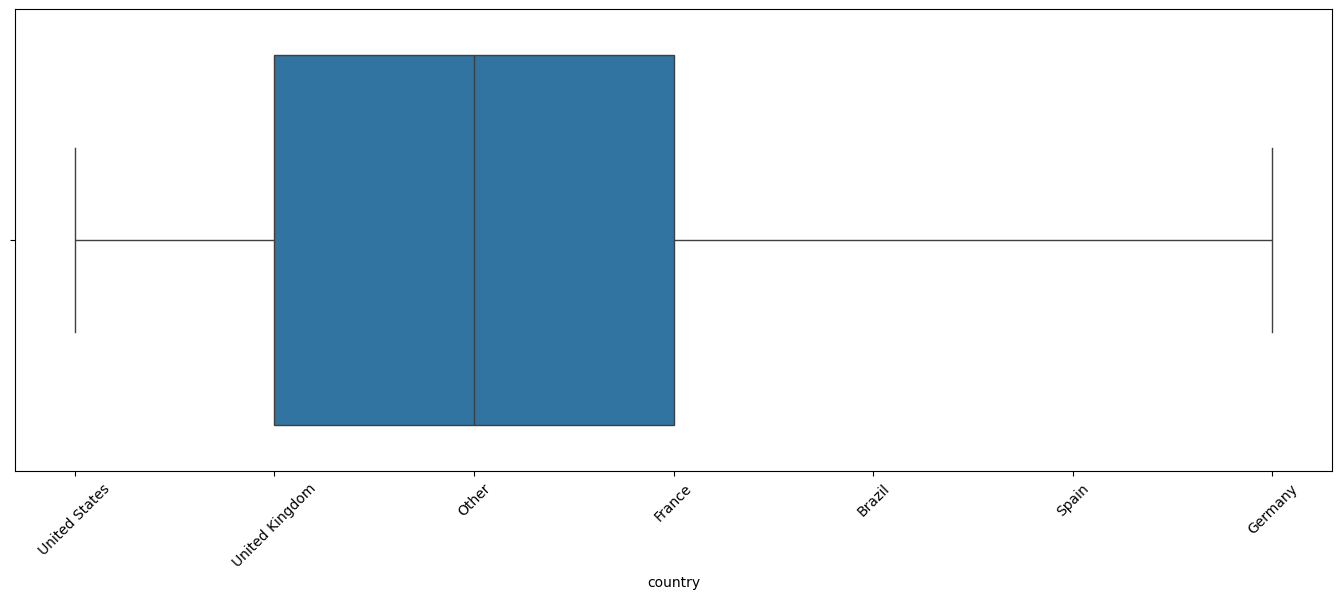

In [410]:
df6 = df5.copy()
category_counts = df6['country'].value_counts()

threshold = 250
rare_categories = category_counts[category_counts < threshold].index

df6['country'] = df6['country'].apply(lambda x: x if x not in rare_categories else 'Other')
print(df6.shape)

plt.figure(figsize=(17, 6))
sns.boxplot(x=df6['country'])
plt.xticks(rotation=45)
plt.show()

> Outliers were replaced by the 'Other' category in Country

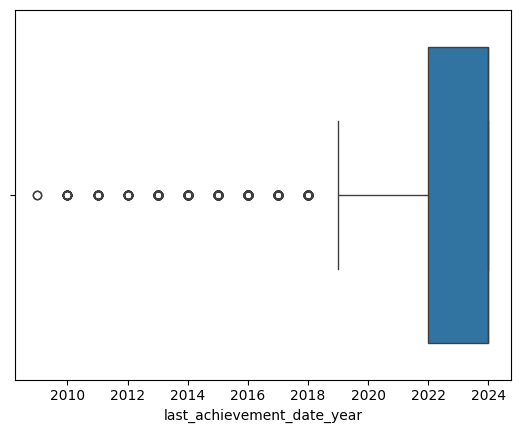

In [411]:
sns.boxplot(x=df6['last_achievement_date_year'])
plt.show()

> Last Achievement Year contains some 2009 values because there are players who achieved trophies late, both values are significant for our analysis; we keep outliers

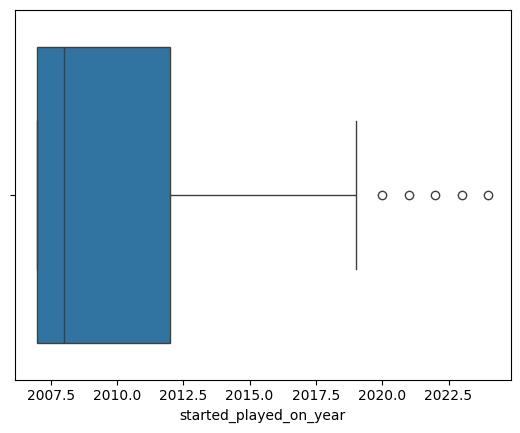

In [412]:
sns.boxplot(x=df6['started_played_on_year'])
plt.show()

In [413]:
df6['started_played_on_year'].value_counts()

started_played_on_year
2007    1726
2008    1150
2013     901
2009     318
2010     277
2012     260
2014     166
2011     112
2015      59
2016      13
2017       7
2019       3
2020       1
2022       1
2021       1
2024       1
2023       1
Name: count, dtype: int64

(4997, 13)


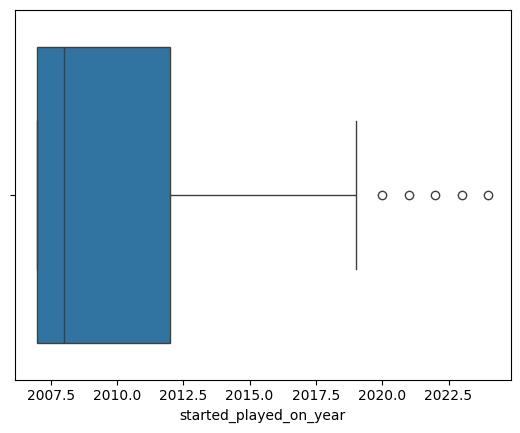

In [414]:
df7 = df6.copy()
df7 = df6[df6['started_played_on_year'] != 0]
print(df7.shape)

sns.boxplot(x=df7['started_played_on_year'])
plt.show()

> There are a minimum amount of outliers that are significant to our purpose; we will keep outliers

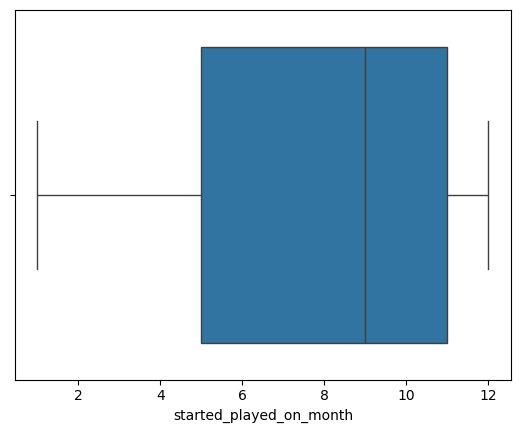

In [415]:
sns.boxplot(x=df7['started_played_on_month'])
plt.show()

> No outliers for Started Played Month

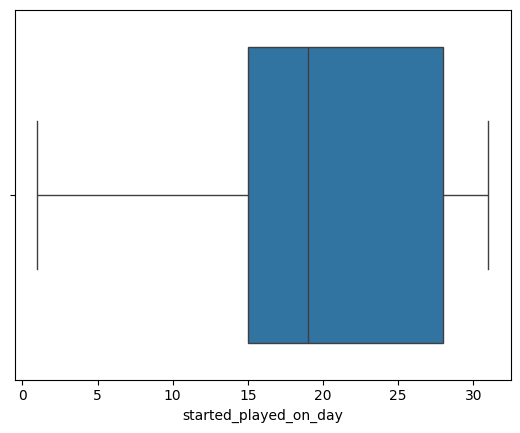

In [416]:
sns.boxplot(x=df7['started_played_on_day'])
plt.show()

> No outliers for Started Played Day

In [417]:
# So far we have the following dataset
print(df7.shape)
df7.head()

(4997, 13)


,playerid,purchased_games,medium_achievements,most_played_genre,achievement_rate,country,nickname,last_achievement_date_year,last_achievement_date_month,last_achievement_date_day,started_played_on_year,started_played_on_month,started_played_on_day
0,1911732,137,442,rpg,229.981308,United States,Eldorath02,2024,11,28,2012,2,7
1,411404,46,63,action,125.611111,United Kingdom,James_Westfall_,2021,3,6,2014,2,20
2,4605390,19,42,free to play,821.600000,Other,termino-pronto6,2024,11,1,2014,2,5
3,4314091,98,202,free to play,51.647887,France,EviL___LaW,2024,11,6,2011,5,31
4,4469538,840,4115,action,794.080392,France,Logann,2024,11,16,2007,6,28


In [418]:
df1_copy = df1.dropna(subset=['started_played_on'])
print(df1_copy.shape)
df1_copy.head()

(4997, 12)


,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,1911732,137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
1,411404,46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20,United Kingdom,James_Westfall_
2,4605390,19,0,42,145,Free to Play,717.057957,821.600000,2024-11-01 10:41:56,2014-02-05,Mexico,termino-pronto6
3,4314091,98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31,France,EviL___LaW
4,4469538,840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28,France,Logann


## Applying Unsupervised ML models

### K-Means

In [419]:
# Before applying any model, we will get rid of identity columns like playerid and nickname
df8 = df7.drop(columns=['playerid', 'nickname'])
df8.head()

,purchased_games,medium_achievements,most_played_genre,achievement_rate,country,last_achievement_date_year,last_achievement_date_month,last_achievement_date_day,started_played_on_year,started_played_on_month,started_played_on_day
0,137,442,rpg,229.981308,United States,2024,11,28,2012,2,7
1,46,63,action,125.611111,United Kingdom,2021,3,6,2014,2,20
2,19,42,free to play,821.600000,Other,2024,11,1,2014,2,5
3,98,202,free to play,51.647887,France,2024,11,6,2011,5,31
4,840,4115,action,794.080392,France,2024,11,16,2007,6,28


In [420]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [421]:
df9 = df8.copy()

label_encoder = LabelEncoder()
df9['most_played_genre'] = label_encoder.fit_transform(df9['most_played_genre'])
df9['country'] = label_encoder.fit_transform(df9['country'])

minmax_scaler = MinMaxScaler()
df_minmax = minmax_scaler.fit_transform(df9)

standard_scaler = StandardScaler()
df_standard = standard_scaler.fit_transform(df9)

df_minmax = pd.DataFrame(df_minmax, columns=df9.columns)
df_standard = pd.DataFrame(df_standard, columns=df9.columns)

Find the better between MinMax and Standard

In [422]:
# Find the optimal K
def find_optimal_k(df, max_k=10):
    silhouette_scores = []
    min_k = 2

    for k in range(min_k, max_k):
        kmean = KMeans(n_clusters=k).fit(df)
        score = metrics.silhouette_score(df, kmean.labels_)
        print("Silhouette Coefficients for k =", k, "is", score)
        silhouette_scores.append(score)

    optimal_K = silhouette_scores.index(max(silhouette_scores)) + min_k
    print("Optimal K is", optimal_K)
    return optimal_K

In [423]:
k_minmax = find_optimal_k(df_minmax)

Silhouette Coefficients for k = 2 is 0.15954269081755787
Silhouette Coefficients for k = 3 is 0.13318437170012848
Silhouette Coefficients for k = 4 is 0.13957174064899355
Silhouette Coefficients for k = 5 is 0.1442307874139147
Silhouette Coefficients for k = 6 is 0.1376447768283853
Silhouette Coefficients for k = 7 is 0.14284357386866764
Silhouette Coefficients for k = 8 is 0.1475209290768464
Silhouette Coefficients for k = 9 is 0.1524419008770932
Optimal K is 2


In [424]:
k_standard = find_optimal_k(df_standard)

Silhouette Coefficients for k = 2 is 0.1389234230419337
Silhouette Coefficients for k = 3 is 0.1366645748480676
Silhouette Coefficients for k = 4 is 0.12525431925488822
Silhouette Coefficients for k = 5 is 0.14272915021863827
Silhouette Coefficients for k = 6 is 0.1299937890220711
Silhouette Coefficients for k = 7 is 0.13214230270125416
Silhouette Coefficients for k = 8 is 0.114067304725597
Silhouette Coefficients for k = 9 is 0.1271595382568012
Optimal K is 5


In [425]:
def apply_k_means(k, df, target_df):
    kmeans = KMeans(n_clusters=k)

    target_df['Cluster'] = kmeans.fit_predict(df)
    df['Cluster'] = target_df['Cluster']

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df.drop('Cluster', axis=1))

    df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = df['Cluster']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7, edgecolor='black')

    centroids = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

    plt.title(f'K-means Clustering (k={k}) Visualization', fontsize=16)
    plt.xlabel('PCA 1', fontsize=12)
    plt.ylabel('PCA 2', fontsize=12)
    plt.legend()
    plt.show()

    return target_df

/Users/hernanvasquez/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


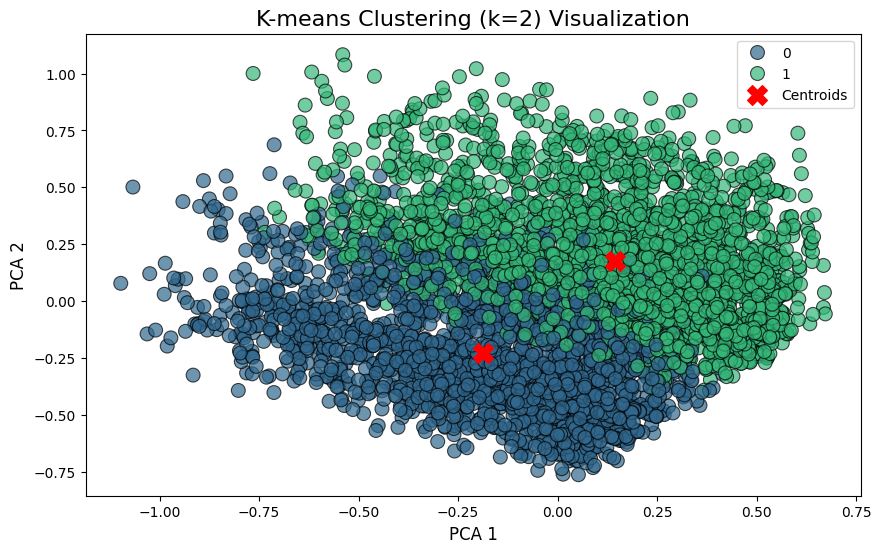

In [426]:
result_df = apply_k_means(k_minmax, df_minmax.copy(), df1_copy.copy())

In [427]:
result_df['Cluster'].value_counts()

Cluster
1    2833
0    2164
Name: count, dtype: int64

/Users/hernanvasquez/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


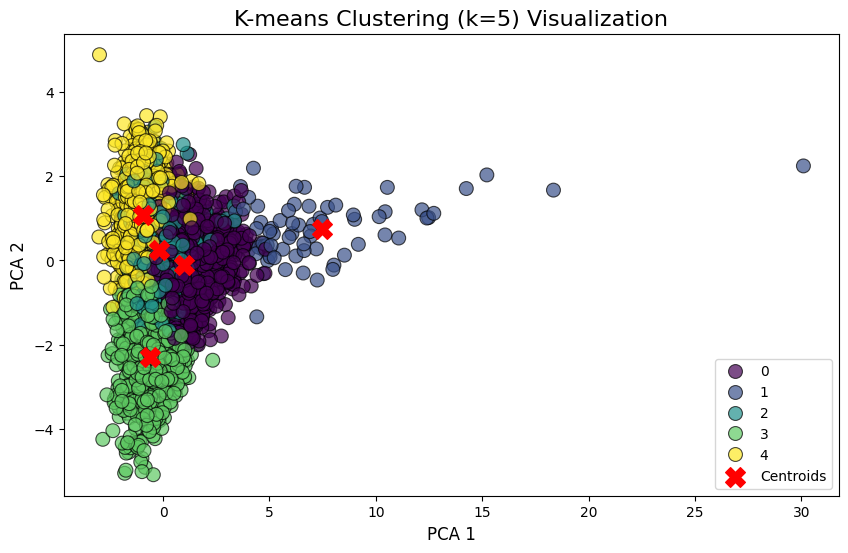

In [428]:
result_df = apply_k_means(k_standard, df_standard.copy(), df1_copy.copy())

In [429]:
result_df['Cluster'].value_counts()

Cluster
0    1605
4    1474
2    1077
3     773
1      68
Name: count, dtype: int64

### DBSCAN

In [430]:
# Find the best metaparameters eps and min_samples
def dbscan_best_metaparameters(df, eps, eps_variance=1):
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors.fit(df)

    base_eps = eps
    if not eps:
        # Compute the distances to the k-th nearest neighbor
        distances, indices = neighbors.kneighbors(df)

        # Sort the distances in ascending order and compute the average distance
        sorted_distances = np.sort(distances[:, -1], axis=0)
        base_eps = np.mean(sorted_distances)
    
    eps_list = [base_eps-eps_variance*2, base_eps-eps_variance, base_eps, base_eps+eps_variance, base_eps+eps_variance*2]

    # Step 2: Experiment with `min_samples` values to find the best clustering density
    min_samples_list = [3, 4, 5, 6, 10]  # A range of values to test for min_samples
    best_score = -1
    best_noise = 1000000

    for min_samples in min_samples_list:
        for eps in eps_list:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(df)
            
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Exclude noise
            num_noise = list(labels).count(-1)
            
            print(f"eps={round(eps, 2)}, min_samples={min_samples} -> Clusters found: {num_clusters}, Noise points: {num_noise}")
            
            if num_clusters >= best_score and num_noise < best_noise:
                best_score = num_clusters
                best_noise = num_noise

In [431]:
def plot_eps_behavior(df):
    k = 3
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors.fit(df)

    distances, indices = neighbors.kneighbors(df)

    distances = np.sort(distances[:, -1], axis=0)

    plt.plot(distances)
    plt.title('k-distance Plot')
    plt.xlabel('Points')
    plt.ylabel(f'{k}-distance')
    plt.show()

In [432]:
def get_silhouette_score(df, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df)

    labels_non_noise = labels[labels != -1]
    scaled_df_non_noise = df[labels != -1]

    sil_score = silhouette_score(scaled_df_non_noise, labels_non_noise)
    print(f"Silhouette Score: {sil_score}")

In [433]:
def run_dbscan_model(df, eps, min_samples, df_target):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df)

    df_target['Cluster'] = dbscan.labels_

    df_results = df.copy()
    df_results['Cluster'] = dbscan.labels_

    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(df_results.drop('Cluster', axis=1))

    df_pca = pd.DataFrame(data=principal_components, columns=['PCA1', 'PCA2'])
    df_pca['Cluster'] = df_results['Cluster']

    get_silhouette_score(df, eps, min_samples)

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=df_pca, s=100, alpha=0.7, edgecolor='black')

    plt.title("DBSCAN Clustering (PCA Projection)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.legend()
    plt.show()

    return df_target

#### For minmax

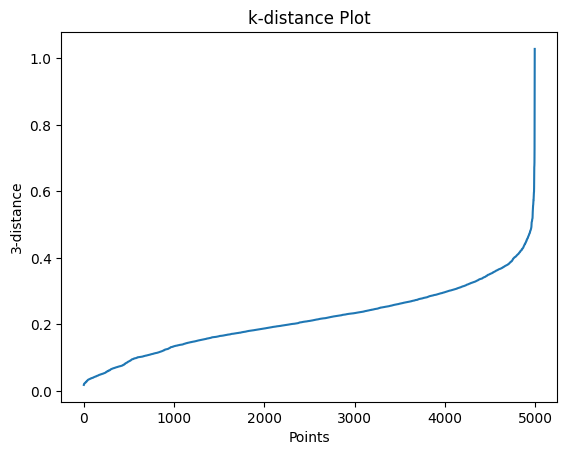

In [434]:
plot_eps_behavior(df_minmax)

Our elbow is near 0.5

In [446]:
dbscan_best_metaparameters(df_minmax.copy(), 0.45, 0.02)

eps=0.41, min_samples=3 -> Clusters found: 7, Noise points: 105
eps=0.43, min_samples=3 -> Clusters found: 4, Noise points: 70
eps=0.45, min_samples=3 -> Clusters found: 2, Noise points: 50
eps=0.47, min_samples=3 -> Clusters found: 2, Noise points: 37
eps=0.49, min_samples=3 -> Clusters found: 2, Noise points: 27
eps=0.41, min_samples=4 -> Clusters found: 3, Noise points: 133
eps=0.43, min_samples=4 -> Clusters found: 2, Noise points: 89
eps=0.45, min_samples=4 -> Clusters found: 1, Noise points: 57
eps=0.47, min_samples=4 -> Clusters found: 1, Noise points: 42
eps=0.49, min_samples=4 -> Clusters found: 1, Noise points: 32
eps=0.41, min_samples=5 -> Clusters found: 4, Noise points: 170
eps=0.43, min_samples=5 -> Clusters found: 1, Noise points: 108
eps=0.45, min_samples=5 -> Clusters found: 1, Noise points: 69
eps=0.47, min_samples=5 -> Clusters found: 1, Noise points: 48
eps=0.49, min_samples=5 -> Clusters found: 1, Noise points: 32
eps=0.41, min_samples=6 -> Clusters found: 2, Noise

Silhouette Score: 0.19475712474451523


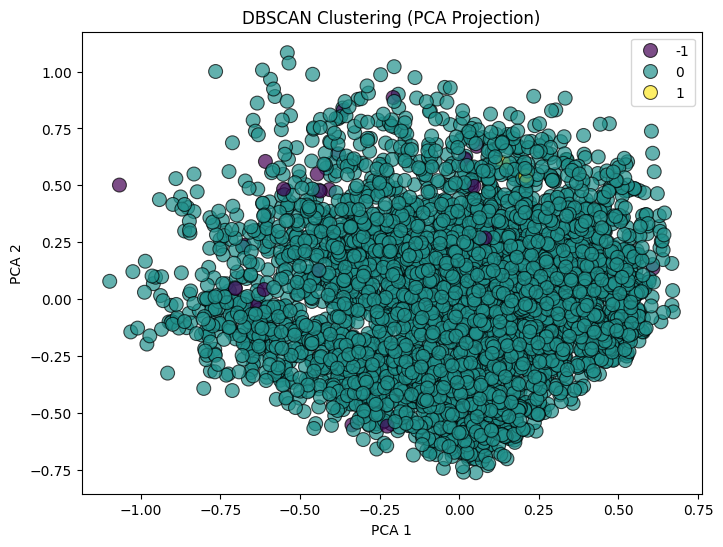

In [461]:
df_result = run_dbscan_model(df_minmax.copy(), 0.49, 3, df1_copy.copy())

In [462]:
df_result['Cluster'].value_counts()

Cluster
 0    4967
-1      27
 1       3
Name: count, dtype: int64

In [449]:
df_result[df_result['Cluster'] == 1].head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname,Cluster
216,153021,6,0,22,108,Automobile,144.838638,127.000,2014-11-17 21:15:48,2009-12-01,France,monster9070,1
2653,3529116,24,0,49,264,strategy,933.056254,-30.250,2012-11-24 03:55:27,2008-11-04,France,Bber,1
4432,2211632,8,0,18,24,Football,284.389205,20.125,2012-12-21 03:53:04,2009-11-03,Portugal,manecas33,1


In [450]:
df_result[df_result['Cluster'] == 0].head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname,Cluster
0,1911732,137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02,0
1,411404,46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20,United Kingdom,James_Westfall_,0
2,4605390,19,0,42,145,Free to Play,717.057957,821.600000,2024-11-01 10:41:56,2014-02-05,Mexico,termino-pronto6,0
3,4314091,98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31,France,EviL___LaW,0
4,4469538,840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28,France,Logann,0


#### For Standard normalization

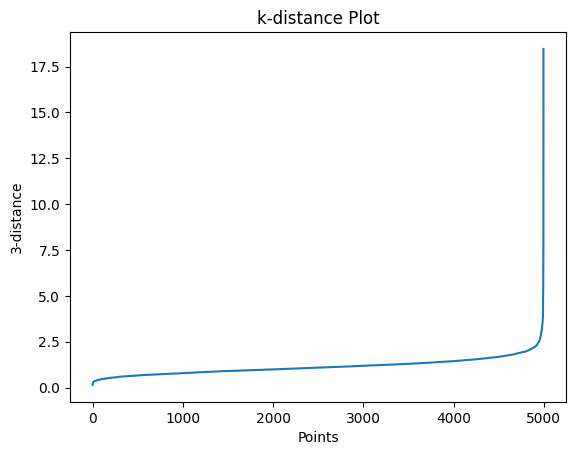

In [451]:
plot_eps_behavior(df_standard)

Our elbow is near 2.5

In [452]:
dbscan_best_metaparameters(df_standard.copy(), 2.5, 0.2)

eps=2.1, min_samples=3 -> Clusters found: 3, Noise points: 91
eps=2.3, min_samples=3 -> Clusters found: 2, Noise points: 55
eps=2.5, min_samples=3 -> Clusters found: 1, Noise points: 36
eps=2.7, min_samples=3 -> Clusters found: 1, Noise points: 24
eps=2.9, min_samples=3 -> Clusters found: 1, Noise points: 19
eps=2.1, min_samples=4 -> Clusters found: 1, Noise points: 108
eps=2.3, min_samples=4 -> Clusters found: 2, Noise points: 58
eps=2.5, min_samples=4 -> Clusters found: 2, Noise points: 38
eps=2.7, min_samples=4 -> Clusters found: 2, Noise points: 25
eps=2.9, min_samples=4 -> Clusters found: 2, Noise points: 19
eps=2.1, min_samples=5 -> Clusters found: 1, Noise points: 114
eps=2.3, min_samples=5 -> Clusters found: 1, Noise points: 63
eps=2.5, min_samples=5 -> Clusters found: 2, Noise points: 39
eps=2.7, min_samples=5 -> Clusters found: 2, Noise points: 28
eps=2.9, min_samples=5 -> Clusters found: 2, Noise points: 23
eps=2.1, min_samples=6 -> Clusters found: 1, Noise points: 124
eps=2

Silhouette Score: 0.6495489146578045


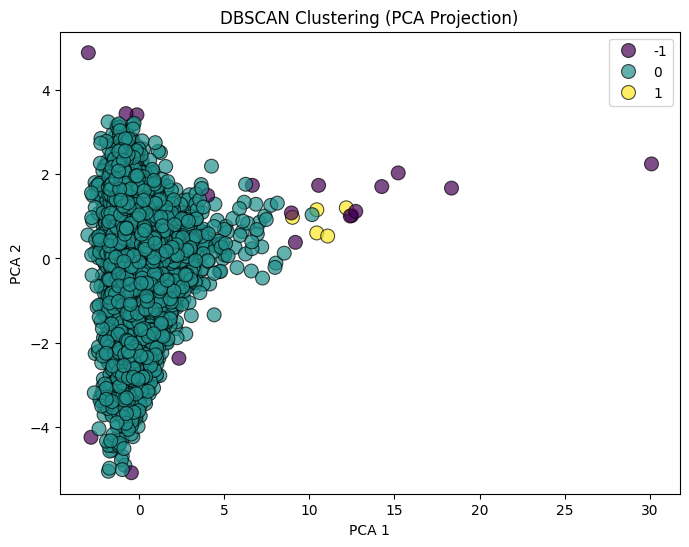

In [453]:
df_result = run_dbscan_model(df_standard.copy(), 2.9, 4, df1_copy.copy())

In [454]:
df_result['Cluster'].value_counts()

Cluster
 0    4973
-1      19
 1       5
Name: count, dtype: int64

In [455]:
df_result[df_result['Cluster'] == 0].head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname,Cluster
0,1911732,137,19,442,2056,Role Playing,7140.931374,229.981308,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02,0
1,411404,46,0,63,161,Action,1606.076595,125.611111,2021-03-06 19:31:31,2014-02-20,United Kingdom,James_Westfall_,0
2,4605390,19,0,42,145,Free to Play,717.057957,821.600000,2024-11-01 10:41:56,2014-02-05,Mexico,termino-pronto6,0
3,4314091,98,3,202,783,Free to Play,4201.700239,51.647887,2024-11-06 23:05:07,2011-05-31,France,EviL___LaW,0
4,4469538,840,235,4115,7037,Action,22725.646440,794.080392,2024-11-16 16:10:59,2007-06-28,France,Logann,0


In [456]:
df_result[df_result['Cluster'] == 1].head()

,playerid,purchased_games,highest_achievements,medium_achievements,lowest_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname,Cluster
362,3130548,2061,1982,27245,23146,Action,22183.832999,54.445938,2024-12-03 21:07:31,2007-11-19,Germany,roofchief,1
1474,337417,2082,1895,25852,23502,Action,23364.717109,167.323699,2024-12-05 06:39:26,2007-06-28,Canada,thedarkmavis,1
2670,336194,2249,1876,27572,20138,Action,40259.119994,45.727467,2024-12-16 16:19:26,2007-11-29,Australia,olsero,1
3606,1210940,2430,2148,31362,22528,Action,31281.659994,103.557159,2024-12-05 21:19:39,2007-11-19,Belgium,gael0didier,1
3709,3088398,2002,1530,21607,21189,Action,24219.244134,463.440149,2024-12-14 04:47:38,2008-01-22,Austria,OniSpreu9527,1


### Agglomerative Clustering

In [480]:
def agglomerative_best_cluster_number(df):
    cluster_range = range(2, 11)
    silhouette_scores = []

    for n_clusters in cluster_range:
        model = AgglomerativeClustering(n_clusters=n_clusters)
        cluster_labels = model.fit_predict(df)

        score = silhouette_score(df, cluster_labels)
        silhouette_scores.append(score)

        print(f"Silhouette Score for {n_clusters} clusters: {score}")

    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different n_clusters')
    plt.xlabel('Number of clusters (n_clusters)')
    plt.ylabel('Silhouette Score')
    plt.show()

    best_n_clusters = cluster_range[np.argmax(silhouette_scores)]
    print(f"Best number of clusters (based on silhouette score): {best_n_clusters}")
    return best_n_clusters

In [495]:
def run_agglomerative_model(df, n_components, df_target):
    model = AgglomerativeClustering(n_clusters=n_components)
    result = model.fit_predict(df)

    df_target['Cluster'] = result
    df['Cluster'] = result

    pca = PCA(n_components=2)
    pca_components = pca.fit_transform(df.drop('Cluster', axis=1))

    pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
    pca_df['Cluster'] = df['Cluster']

    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='viridis', data=pca_df, s=100, alpha=0.7, edgecolor='black')

    centroids = np.array([pca_df[pca_df['Cluster'] == cluster][['PCA1', 'PCA2']].mean(axis=0) for cluster in range(3)])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

    plt.title('Agglomerative Clustering Visualization (PCA)', fontsize=16)
    plt.xlabel('PCA 1', fontsize=12)
    plt.ylabel('PCA 2', fontsize=12)
    plt.legend()
    plt.show()

    return df_target

For MinMax Normalization

Silhouette Score for 2 clusters: 0.1823598251525272
Silhouette Score for 3 clusters: 0.15616405349725723
Silhouette Score for 4 clusters: 0.12412585997122531
Silhouette Score for 5 clusters: 0.13255140270076818
Silhouette Score for 6 clusters: 0.09680158307289714
Silhouette Score for 7 clusters: 0.10077342769007229
Silhouette Score for 8 clusters: 0.09824349932403531
Silhouette Score for 9 clusters: 0.08463647081351114
Silhouette Score for 10 clusters: 0.09108790748913291


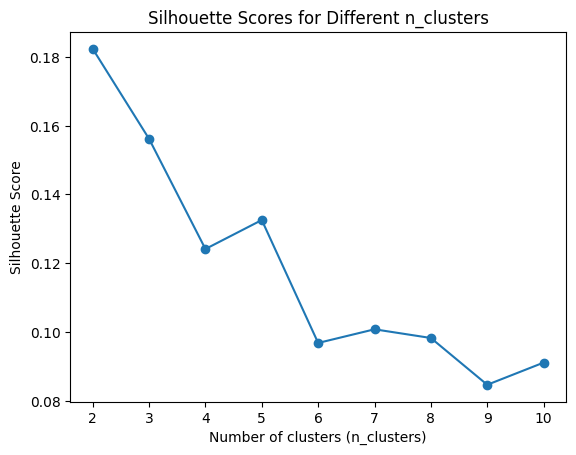

Best number of clusters (based on silhouette score): 2


In [482]:
minmax_best_cluster = agglomerative_best_cluster_number(df_minmax.copy())

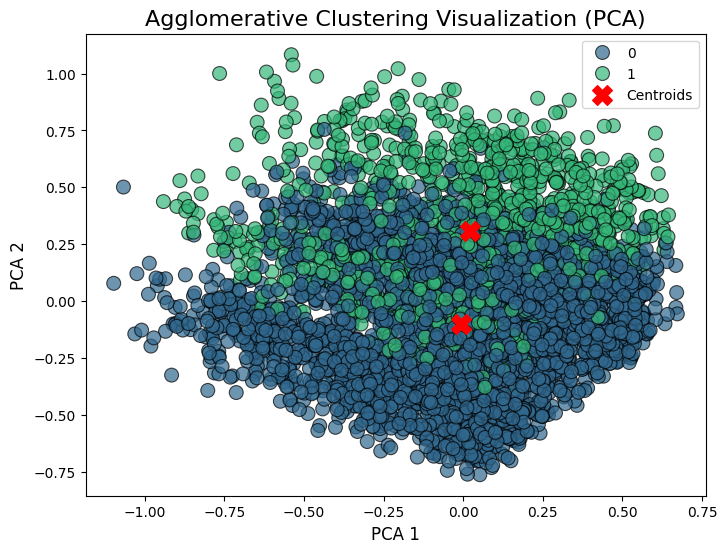

In [494]:
df_result = run_agglomerative_model(df_minmax.copy(), minmax_best_cluster, df1_copy.copy())

For Standard Normalization

Silhouette Score for 2 clusters: 0.10527482425872096
Silhouette Score for 3 clusters: 0.1114511649976207
Silhouette Score for 4 clusters: 0.11671582629170589
Silhouette Score for 5 clusters: 0.10506315522445102
Silhouette Score for 6 clusters: 0.0891224898813726
Silhouette Score for 7 clusters: 0.09479026410707538
Silhouette Score for 8 clusters: 0.09464237230896214
Silhouette Score for 9 clusters: 0.09138664561652966
Silhouette Score for 10 clusters: 0.09184603640574153


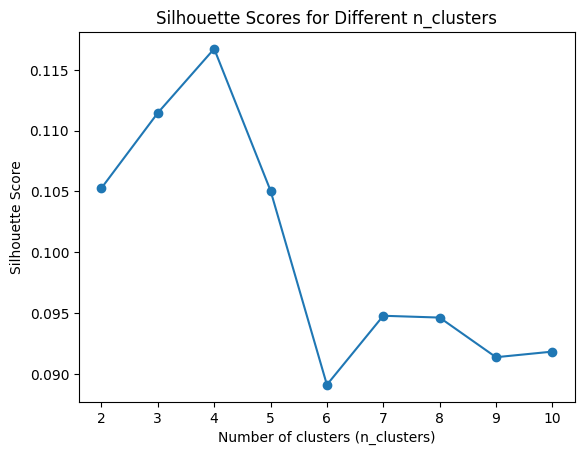

Best number of clusters (based on silhouette score): 4


In [484]:
standard_best_cluster = agglomerative_best_cluster_number(df_standard.copy())

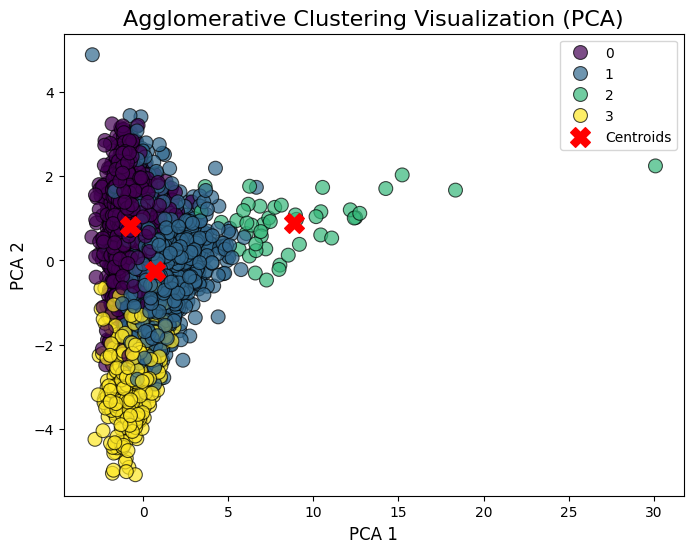

In [496]:
df_result = run_agglomerative_model(df_standard.copy(), standard_best_cluster, df1_copy.copy())

## Model Comparisson